Iteration    0: Cost  2790.96   
Iteration  150: Cost   656.24   
Iteration  300: Cost   345.51   
Iteration  450: Cost   181.97   
Iteration  600: Cost    95.91   
Iteration  750: Cost    50.61   
Iteration  900: Cost    26.77   
Iteration 1050: Cost    14.23   
Iteration 1200: Cost     7.62   
Iteration 1350: Cost     4.15   
w,b found by gradient descent: 1.6450471346747235 104.95819779100808


Text(0.5, 0, 'Population of City in 10,000s')

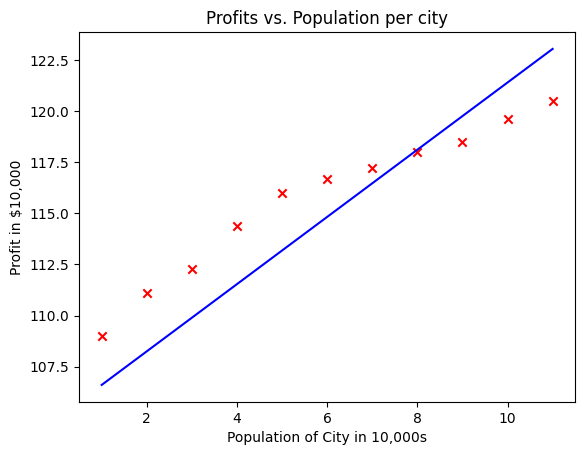

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

x_train=np.array([1,2,3,4,5,6,7,8,9,10,11])
y_train=np.array([109.0,111.1,112.3,114.4,116.0,116.7,117.2,118.0,118.5,119.6,120.5])

def compute_cost(x, y, w, b): 
    m = x.shape[0] 
    total_cost = 0
    for i in range (m):
        total_cost=total_cost+(w*x[i]+b-y[i])**2
    total_cost=total_cost/(2*m)
    return total_cost
    
    
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        dj_dw = dj_dw + (w*x[i]+b-y[i])*x[i]
        dj_db = dj_db + w*x[i]+b-y[i]
    dj_dw = dj_dw/m
    dj_db = dj_db/m
        
    return dj_dw, dj_db
    
 
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    m = len(x)
    
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        if i<100000:      
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing
    
    
initial_w = 0.
initial_b = 0.

iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)


m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b
    
    
plt.plot(x_train, predicted, c = "b")

plt.scatter(x_train, y_train, marker='x', c='r') 

plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')